In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [13]:
csv_in = 'ai-end2-1.csv'

In [14]:
df = pd.read_csv(csv_in, delimiter=',', header=0)
print(df.shape)
print(df.info())
display(df.head())

(107, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   107 non-null    float64
 1   A       107 non-null    float64
 2   B       107 non-null    float64
 3   C       107 non-null    float64
dtypes: float64(4)
memory usage: 3.5 KB
None


,label,A,B,C
0,1.0,0.288374,0.957809,0.643425
1,1.0,0.954157,0.861865,0.801566
2,1.0,0.605162,0.818588,0.871809
3,0.0,0.369670,0.090991,0.285757
4,0.0,0.951802,0.080485,0.634434


In [15]:
print('A')
print('precision:', precision_score(df['label'], df['A']>=0.4))
print('recall:', recall_score(df['label'], df['A']>=0.4))
print('accuracy(Q2):', accuracy_score(df['label'], df['A']>=0.4))
#predA = (df['A']>=0.4).astype('int')
predA = df['A'].map(lambda x: 1 if x >= 0.4 else 0)
ctA = pd.crosstab(df['label'], predA)
fpA = ctA.loc[0,1]
tnA = ctA.loc[0,0]
print('false positive rate:', fpA/(fpA+tnA))
display(ctA)

A
precision: 0.6506024096385542
recall: 0.8571428571428571
accuracy(Q2): 0.6448598130841121
false positive rate: 0.6590909090909091


A,0,1
label,,
0.0,15,29
1.0,9,54


In [16]:
print('B')
print('precision:', precision_score(df['label'], df['B']>=0.5))
print('recall:', recall_score(df['label'], df['B']>=0.5))
print('accuracy(Q2):', accuracy_score(df['label'], df['B']>=0.5))
#predB = (df['B']>=0.5).astype('int')
predB = df['B'].map(lambda x: 1 if x >= 0.5 else 0)
ctB = pd.crosstab(df['label'], predB)
fpB = ctB.loc[0,1]
tnB = ctB.loc[0,0]
print('false positive rate:', fpB/(fpB+tnB))
print('specificity:', tnB/(fpB+tnB))
display(ctB)

B
precision: 0.7887323943661971
recall: 0.8888888888888888
accuracy(Q2): 0.794392523364486
false positive rate: 0.3409090909090909
specificity: 0.6590909090909091


B,0,1
label,,
0.0,29,15
1.0,7,56


In [17]:
y_true = df['label']
y_score = df['A']
fprA, tprA, thresholdsA = roc_curve(y_true, y_score)
print('AUC(A):', roc_auc_score(y_true, y_score))
#print('AUC(A):', auc(fprA, tprA))  # from fpr and tpr
y_score = df['B']
fprB, tprB, thresholdsB = roc_curve(y_true, y_score)
print('AUC(B):', roc_auc_score(y_true, y_score))
#print('AUC(B):', auc(fprB, tprB))  # from fpr and tpr
y_score = df['C']
fprC, tprC, thresholdsC = roc_curve(y_true, y_score)
print('AUC(C):', roc_auc_score(y_true, y_score))
#print('AUC(C):', auc(fprC, tprC)) # from fpr and tpr

AUC(A): 0.7316017316017315
AUC(B): 0.8993506493506493
AUC(C): 0.9448051948051949


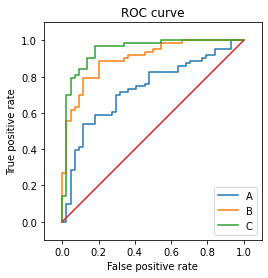

In [18]:
plt.plot(fprA, tprA, label='A')
plt.plot(fprB, tprB, label='B')
plt.plot(fprC, tprC, label='C')
plt.plot([0,1],[0,1])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()